# KBO 데이터 EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 모듈 임포트

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (27.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and direc

In [3]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

## 데이터 불러오기

In [4]:
hitter = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/[DArt-B] 야구 데이터분석 프로젝트/data/hitter_player.csv")
pitcher = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/[DArt-B] 야구 데이터분석 프로젝트/data/pitcher_player.csv")
kbo_result = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/[DArt-B] 야구 데이터분석 프로젝트/data/kbo_results_2015_to_2023.csv")
trend_2024 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/[DArt-B] 야구 데이터분석 프로젝트/data/trend_2024.csv")

## 2024년 상위 타자 데이터 (05.25기준)


In [5]:
hitter.head()

,선수명,팀명,타율,경기수,타석,타수,득점,안타,2루타,3루타,홈런,루타수,타점,희생번트,희생플라이
0,허경민,두산,0.389,45,187,162,33,63,12,0,2,81,27,0,4
1,에레디아,SSG,0.381,49,209,189,32,72,10,0,7,103,38,0,3
2,도슨,키움,0.369,50,224,203,34,75,18,2,7,118,29,0,1
3,양의지,두산,0.339,46,187,168,21,57,8,0,7,86,43,0,5
4,김도영,KIA,0.337,49,217,199,43,67,7,3,11,113,31,1,2


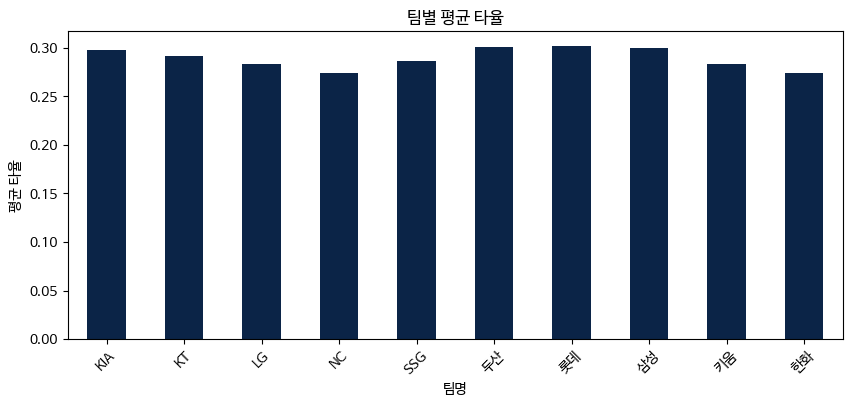

In [6]:
# 팀별 평균 타율
hitter_avg = hitter.groupby('팀명')['타율'].mean()

plt.figure(figsize=(10, 4))
hitter_avg.plot(kind='bar', color='#0B2447')
plt.title('팀별 평균 타율')
plt.xlabel('팀명')
plt.ylabel('평균 타율')
plt.xticks(rotation=45)
plt.show()

In [7]:
hitter.groupby('팀명')['타율'].mean().sort_values(ascending=False)

팀명
롯데     0.302000
두산     0.300429
삼성     0.299750
KIA    0.297429
KT     0.291667
SSG    0.286143
LG     0.282875
키움     0.282800
NC     0.274333
한화     0.274250
Name: 타율, dtype: float64

> 롯데 타율이 1등인데 순위는 최하위권,,

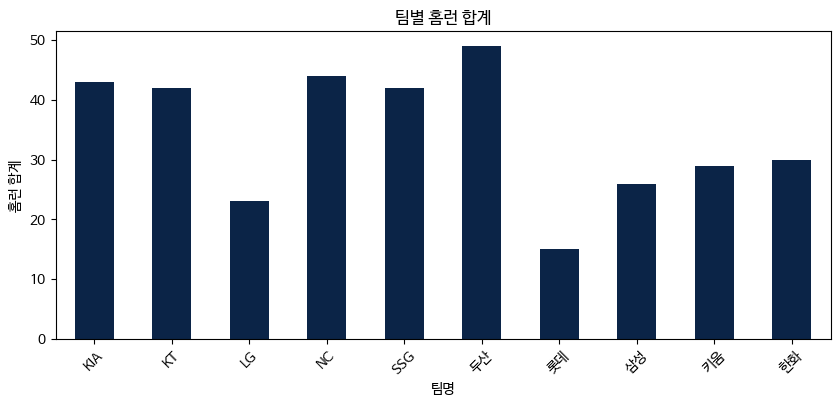

In [8]:
# 팀별 홈런 합계
hitter_homerun = hitter.groupby('팀명')['홈런'].sum()

plt.figure(figsize=(10, 4))
hitter_homerun.plot(kind='bar', color='#0B2447')
plt.title('팀별 홈런 합계')
plt.xlabel('팀명')
plt.ylabel('홈런 합계')
plt.xticks(rotation=45)
plt.show()

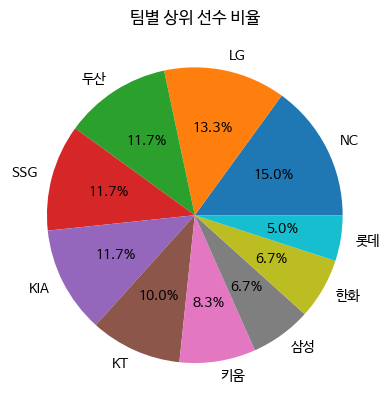

In [9]:
# 팀별 선수 카운트
player_count = hitter['팀명'].value_counts()

player_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('팀별 상위 선수 비율')
plt.ylabel('')
plt.show()

## 2024년 상위 투수 데이터 (05.25기준)

In [10]:
pitcher

,선수명,팀명,평균자책점,경기수,승리,패배,세이브,홀드,승률,투구 이닝,피안타,피홈런,볼넷,사구,탈삼진,실점,자책점,이닝당 출루허용률
0,네일,KIA,1.65,10,5,1,0,0,0.833,60,56,2,10,4,62,20,11,1.10
1,원태인,삼성,2.35,10,5,2,0,0,0.714,57 1/3,45,4,16,3,47,16,15,1.06
2,하트,NC,2.74,10,5,1,0,0,0.833,62 1/3,52,2,15,2,60,22,19,1.07
3,양현종,KIA,2.84,11,4,2,0,0,0.667,69 2/3,63,6,15,3,48,24,22,1.12
4,쿠에바스,KT,2.99,11,2,5,0,0,0.286,69 1/3,52,7,17,0,73,25,23,1.00
5,신민혁,NC,3.02,10,4,3,0,0,0.571,53 2/3,66,6,4,1,39,22,18,1.30
6,헤이수스,키움,3.47,10,5,3,0,0,0.625,57,50,5,15,6,55,23,22,1.14
7,곽빈,두산,3.50,11,4,4,0,0,0.500,64 1/3,56,1,23,2,64,26,25,1.23
8,반즈,롯데,3.50,10,3,2,0,0,0.600,61 2/3,57,7,18,3,79,24,24,1.22
9,박세웅,롯데,3.59,10,5,3,0,0,0.625,57 2/3,60,3,16,3,39,29,23,1.32


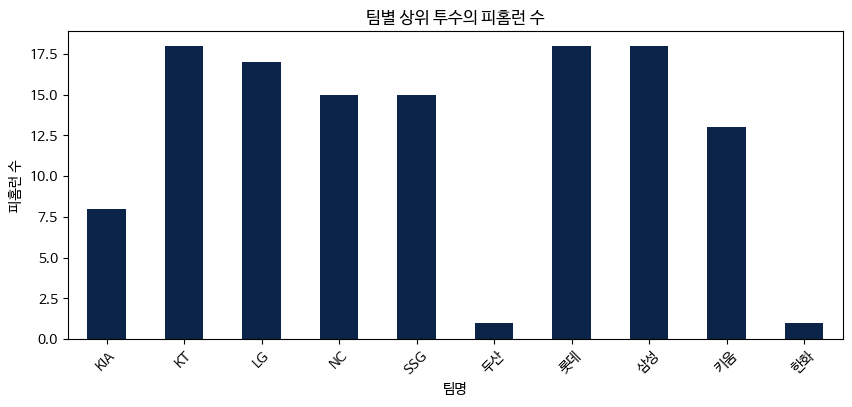

In [11]:
# 팀별 상위권 투수의 피홈런 수 계산
pitcher_hr = pitcher.groupby('팀명')['피홈런'].sum()

plt.figure(figsize=(10, 4))
pitcher_hr.plot(kind='bar', color='#0B2447')
plt.title('팀별 상위 투수의 피홈런 수')
plt.xlabel('팀명')
plt.ylabel('피홈런 수')
plt.xticks(rotation=45)
plt.show()

> 역시 두산! 의외의 한화..?

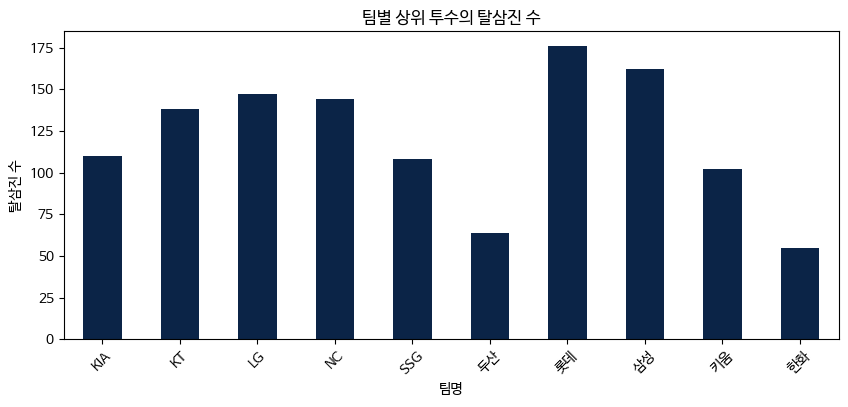

In [12]:
# 팀별 상위권 투수의 탈삼진 수 계산
pitcher_so = pitcher.groupby('팀명')['탈삼진'].sum()

plt.figure(figsize=(10, 4))
pitcher_so.plot(kind='bar', color='#0B2447')
plt.title('팀별 상위 투수의 탈삼진 수')
plt.xlabel('팀명')
plt.ylabel('탈삼진 수')
plt.xticks(rotation=45)
plt.show()

> 두산과 한화의 상위 투수는 피홈런 수는 적지만 탈삼진 수도 적다.

## 2015-2023 팀별 승패 데이터

In [13]:
kbo_result.tail(10)

,연도,순위,팀 이름,승,패,승차,최근 경기 결과
80,2023,1,LG,86,56,0.0,5승-5패-0무
81,2023,2,KT,79,62,6.5,6승-4패-0무
82,2023,3,SSG,76,65,9.5,8승-2패-0무
83,2023,4,NC,75,67,11.0,5승-5패-0무
84,2023,5,두산,74,68,12.0,4승-6패-0무
85,2023,6,KIA,73,69,13.0,7승-3패-0무
86,2023,7,롯데,68,76,19.0,4승-6패-0무
87,2023,8,삼성,61,82,25.5,4승-6패-0무
88,2023,9,한화,58,80,26.0,3승-7패-0무
89,2023,10,키움,58,83,27.5,5승-5패-0무


> 팀명이 바뀐 팀이 있어서 먼저 처리한다.  
**SK > SSG / 넥센 > 키움 / kt > KT**

In [14]:
kbo_result['팀 이름'].value_counts()

팀 이름
두산            9
삼성            9
NC            9
한화            9
KIA           9
롯데            9
LG            9
SK            6
KT            6
키움            5
넥센            4
kt            3
SSG           3
Name: count, dtype: int64

In [15]:
# 팀 이름 변경
kbo_result['팀 이름'] = kbo_result['팀 이름'].str.strip() # 공백제거
kbo_result['팀 이름'] = kbo_result['팀 이름'].replace({'넥센': '키움', 'SK': 'SSG', 'kt': 'KT'})

In [16]:
kbo_result

,연도,순위,팀 이름,승,패,승차,최근 경기 결과
0,2015,1,두산,79,65,0.0,7승-3패-0무
1,2015,2,삼성,88,56,-9.0,4승-6패-0무
2,2015,3,NC,84,57,-6.5,5승-4패-1무
3,2015,4,키움,78,65,0.5,4승-6패-0무
4,2015,5,SSG,69,73,9.0,6승-4패-0무
...,...,...,...,...,...,...,...
85,2023,6,KIA,73,69,13.0,7승-3패-0무
86,2023,7,롯데,68,76,19.0,4승-6패-0무
87,2023,8,삼성,61,82,25.5,4승-6패-0무
88,2023,9,한화,58,80,26.0,3승-7패-0무


In [17]:
kbo_result.to_csv('kbo_result.csv', index=False, encoding="utf-8-sig")

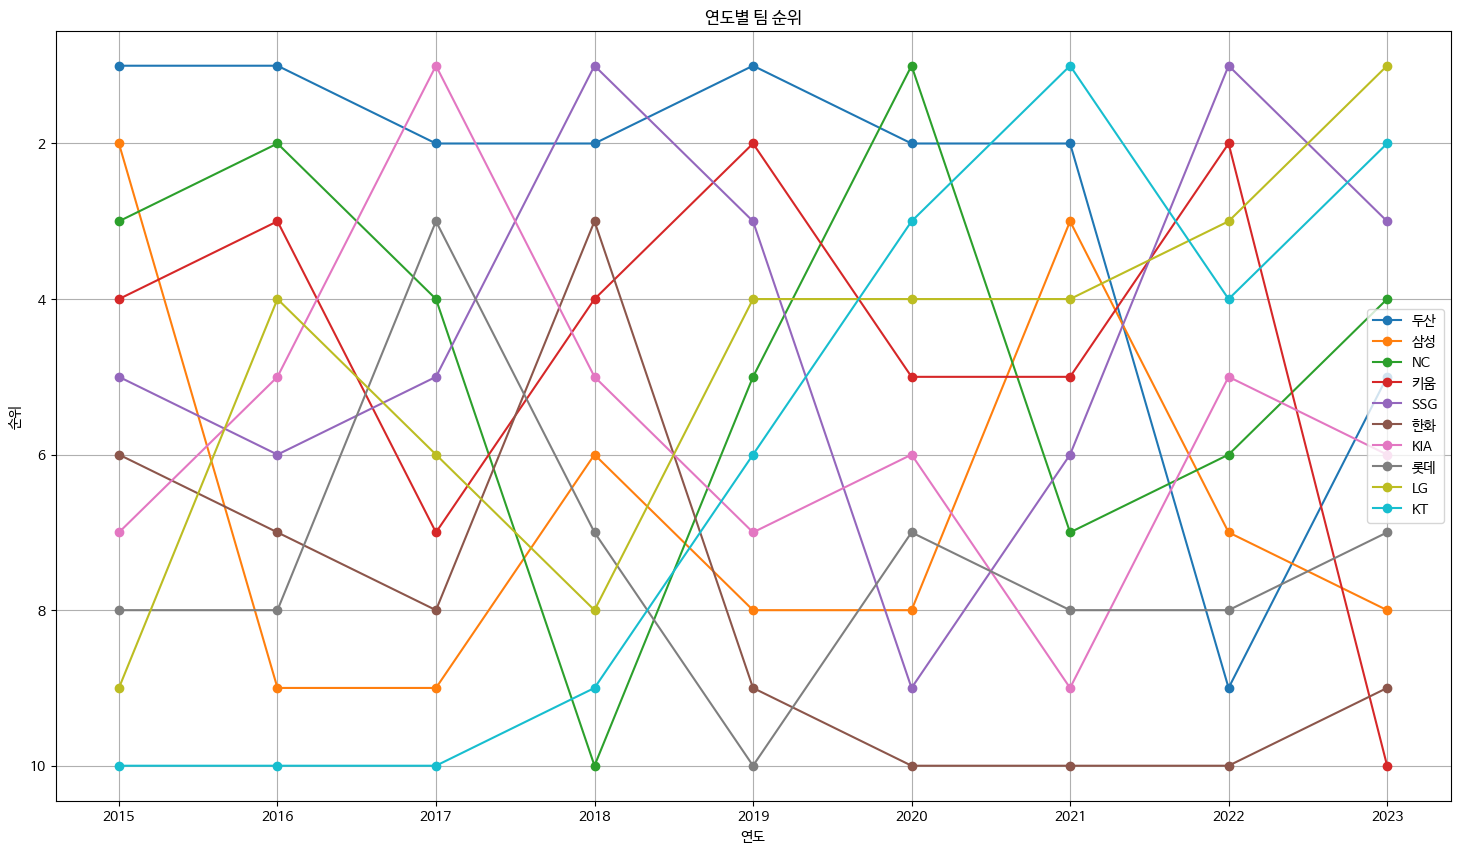

In [18]:
# 각 팀의 연도별 순위
plt.figure(figsize=(18, 10))

for team in kbo_result['팀 이름'].unique():
    temp_df = kbo_result[kbo_result['팀 이름'] == team]
    plt.plot(temp_df['연도'], temp_df['순위'], marker='o', label=team)

plt.gca().invert_yaxis()
plt.title('연도별 팀 순위')
plt.xlabel('연도')
plt.ylabel('순위')
plt.legend()
plt.grid()
plt.show()

> **태블로 활용해서 시각화**

1) 전체 팀 순위

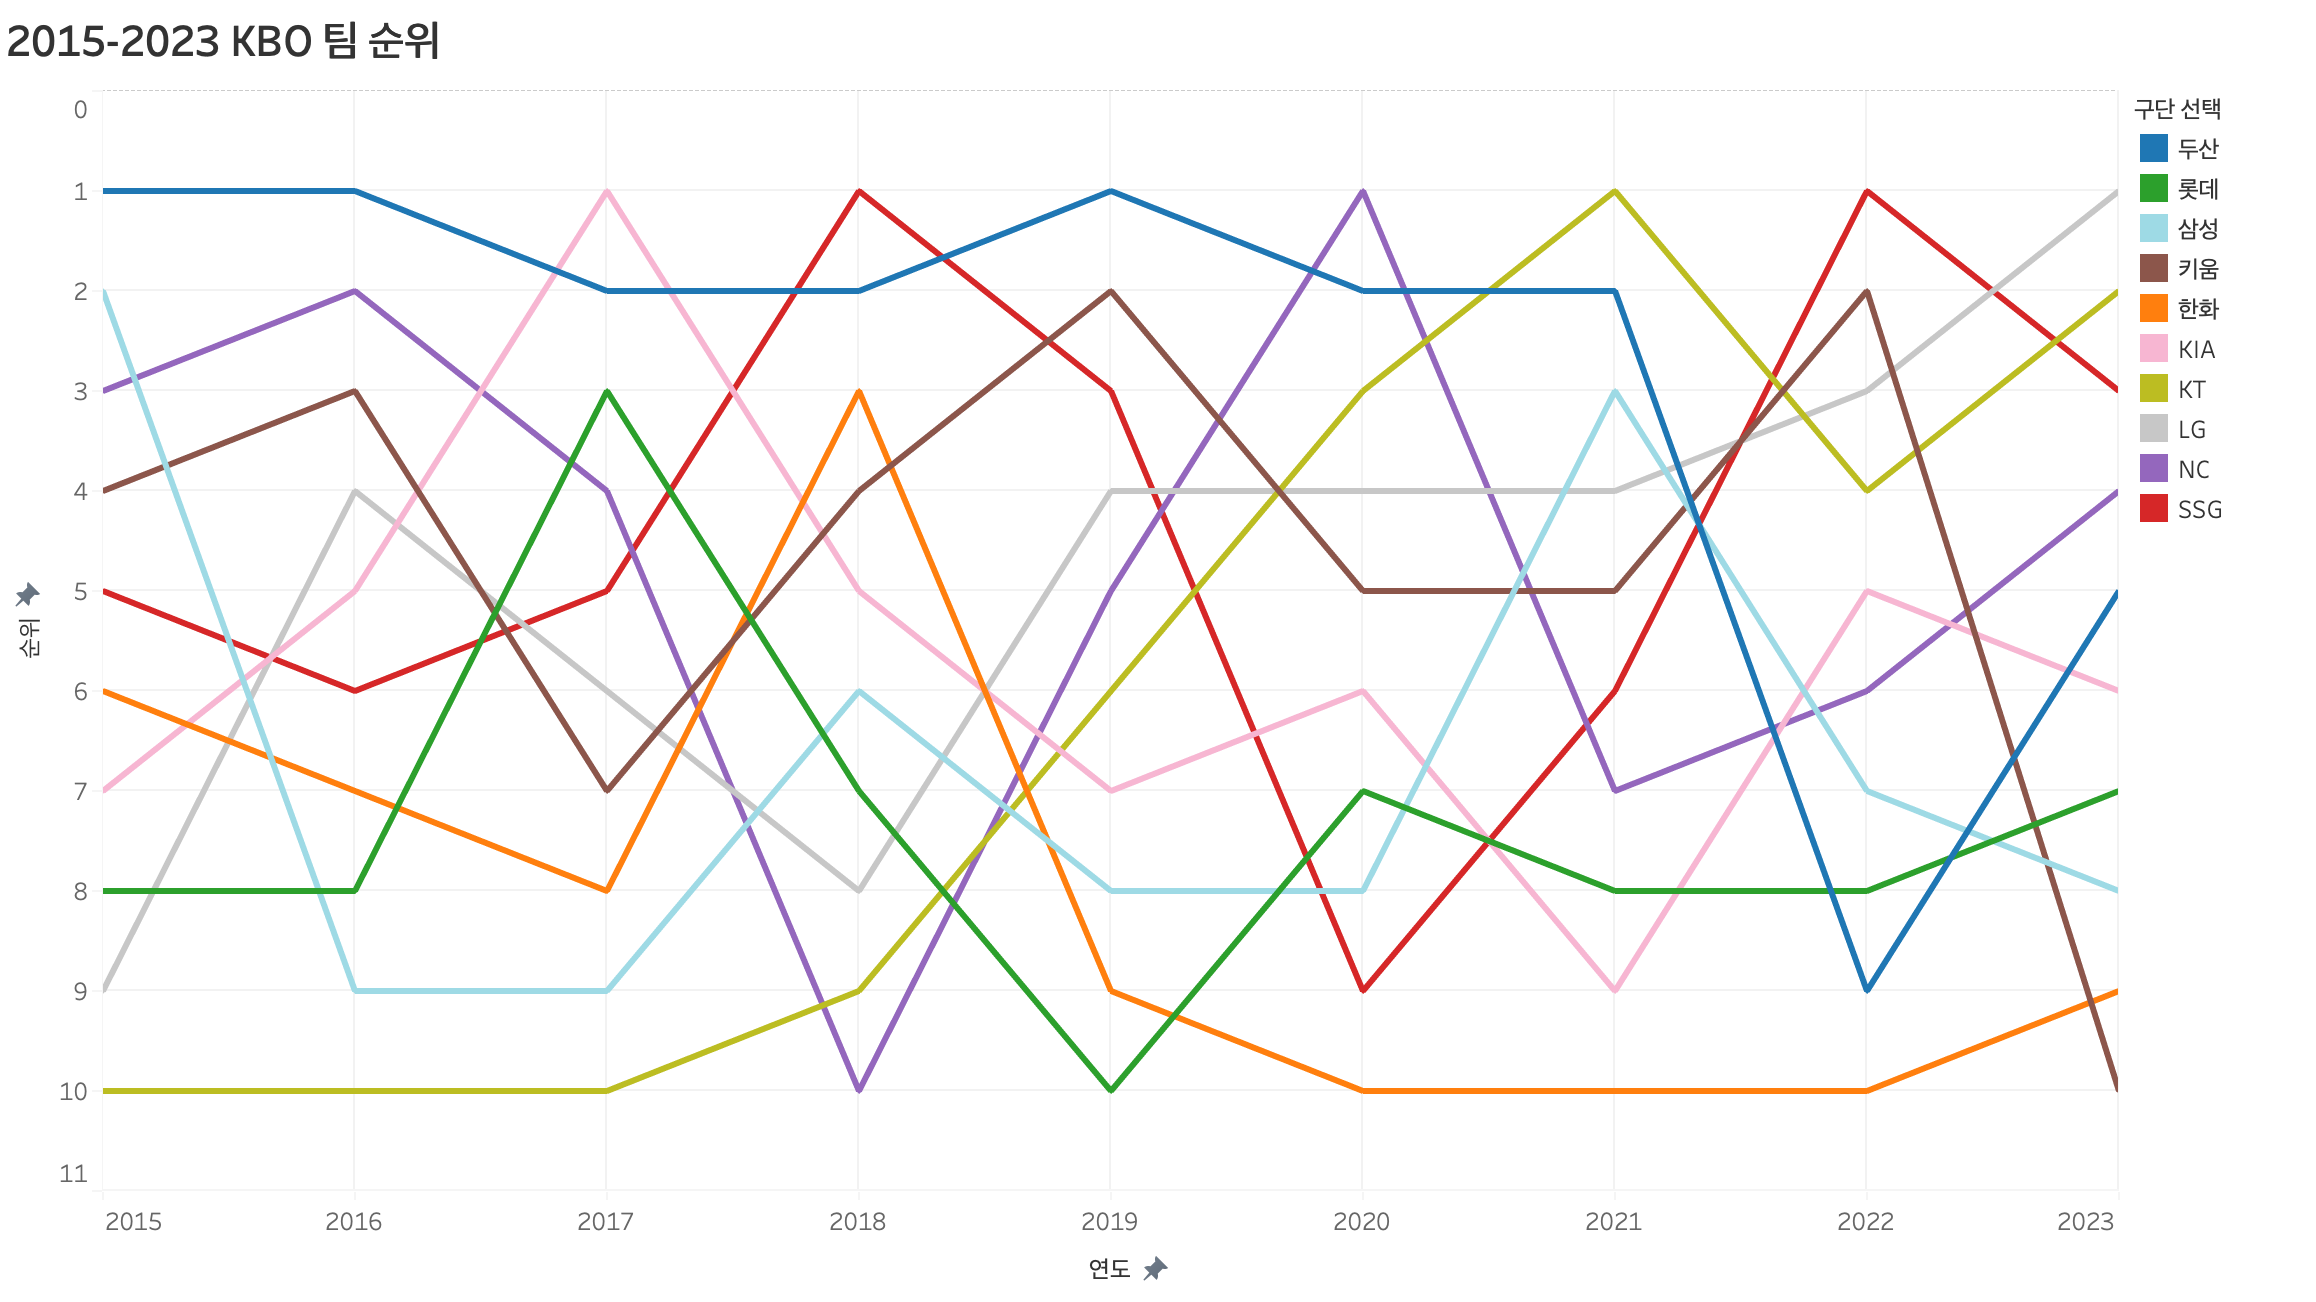

2) 특정 팀 순위 (필터 조건 사용)

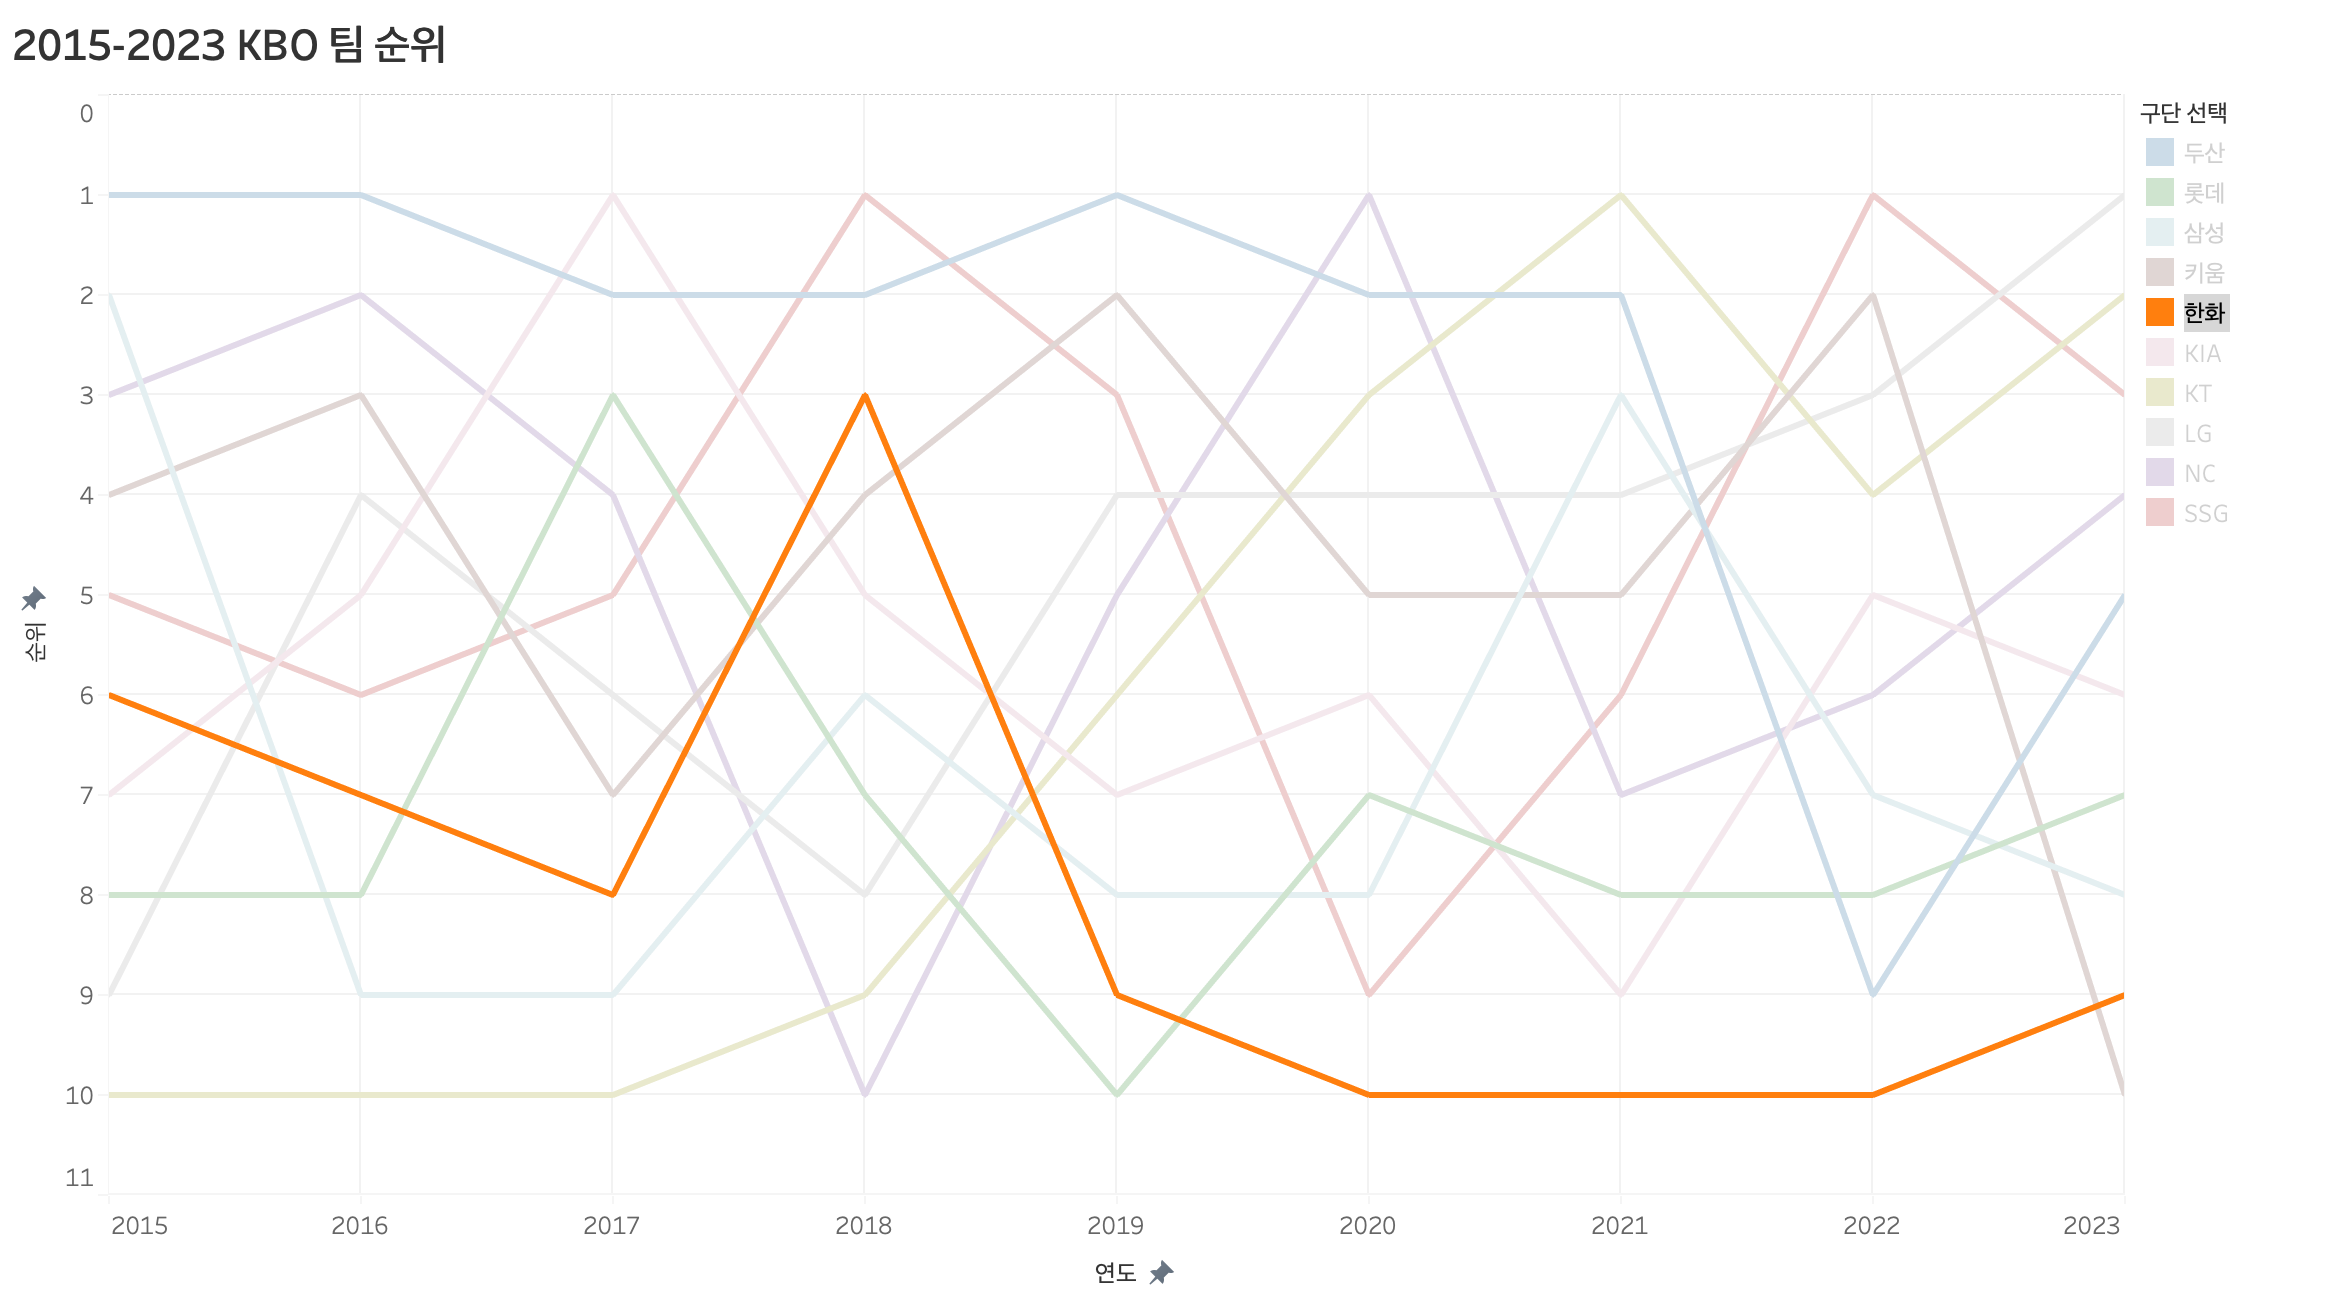

## KBO 구단 트렌드 데이터 (검색량 분석)

In [36]:
trend_2024 = trend_2024.reset_index()
trend_2024

,팀명,2024.3.23,2024.3.24,2024.3.25,2024.3.26,2024.3.27,2024.3.28,2024.3.29,2024.3.30,2024.3.31,...,2024.5.15,2024.5.16,2024.5.17,2024.5.18,2024.5.19,2024.5.20,2024.5.21,2024.5.22,2024.5.23,2024.5.24
0,두산베어스,35519,30373,14459,23895,25701,31776,34914,28632,29724,...,39782,39787,37131,32219.0,39850,23736,30480,32731,38845,50594
1,LG트윈스,15800,14610,6390,11427,16285,15579,19211,18417,17917,...,12854,14330,14399,NaN,17227,7091,12983,14829,13995,15411
2,한화이글스,90413,74100,32602,62628,76274,108140,161136,206459,237815,...,81517,64784,60882,68385.0,69838,28775,65745,87521,87881,77636
3,SSG랜더스,27045,28937,12983,21237,20144,22400,19837,21677,22394,...,18283,19471,19700,NaN,20295,10785,17675,19820,18788,24863
4,롯데자이언츠,42262,44661,20276,35377,43152,31701,58060,61375,73645,...,33066,37242,53610,45550.0,53337,22513,46290,58985,76871,88123
5,삼성라이온즈,42379,53721,25519,39215,42949,42734,45922,50085,49720,...,32486,45907,58612,75173.0,74492,24294,62702,52255,51571,53006
6,기아타이거즈,51558,45918,21288,37731,45004,39820,57385,62028,51772,...,63519,74198,64606,64521.0,63831,25305,51267,52030,57321,75384
7,키움히어로즈,17149,15010,8239,13424,14171,12815,21059,26407,25607,...,12965,15339,16708,15787.0,17506,8698,13781,16038,16856,16115
8,NC다이노스,23039,20546,7561,13388,14452,12711,14348,16655,23959,...,24747,23966,29558,NaN,28196,9393,19370,24574,22938,20122
9,KT위즈,5616,5222,2556,3970,4521,5216,4394,4636,4470,...,3469,3357,3408,NaN,4125,2012,3271,3016,2764,3371


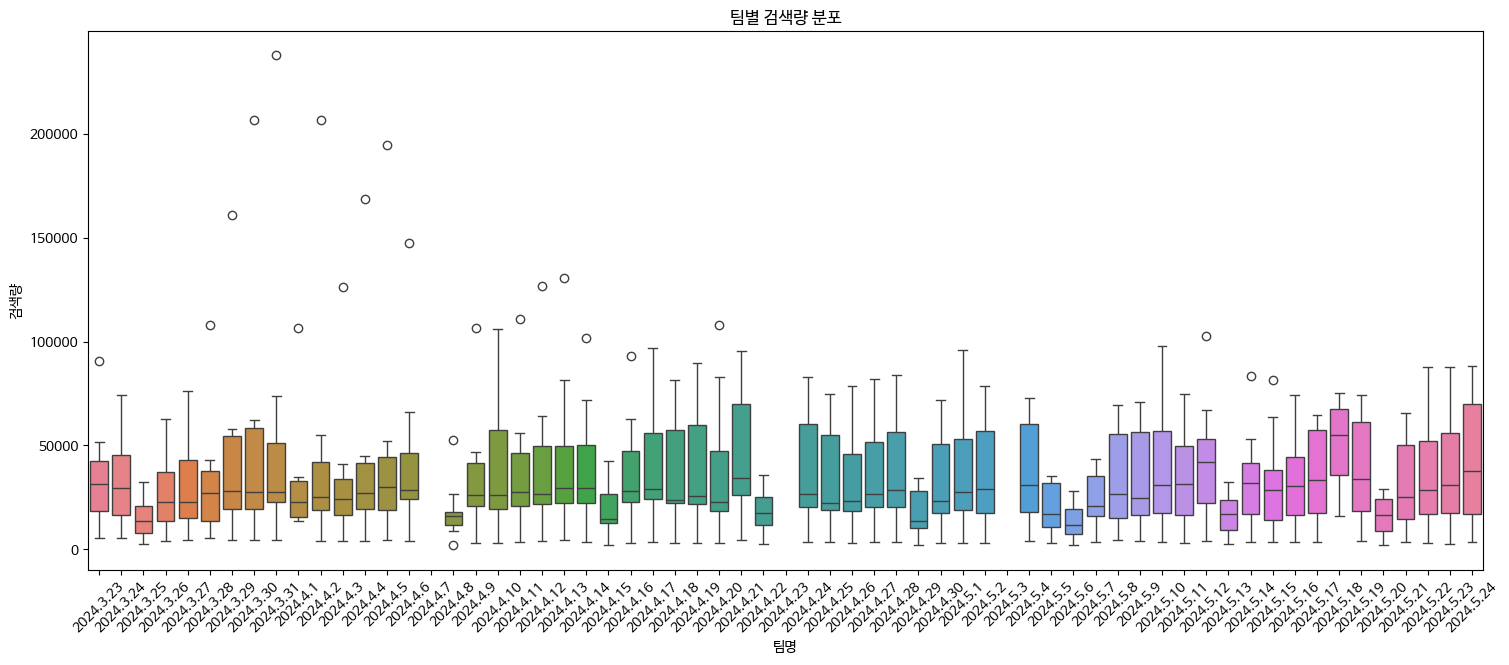

In [27]:
# 날짜별 이상치 확인
plt.figure(figsize=(18, 7))
sns.boxplot(data=trend_2024)

plt.title('팀별 검색량 분포')
plt.xlabel('팀명')
plt.ylabel('검색량')
plt.xticks(rotation=45)
plt.show()

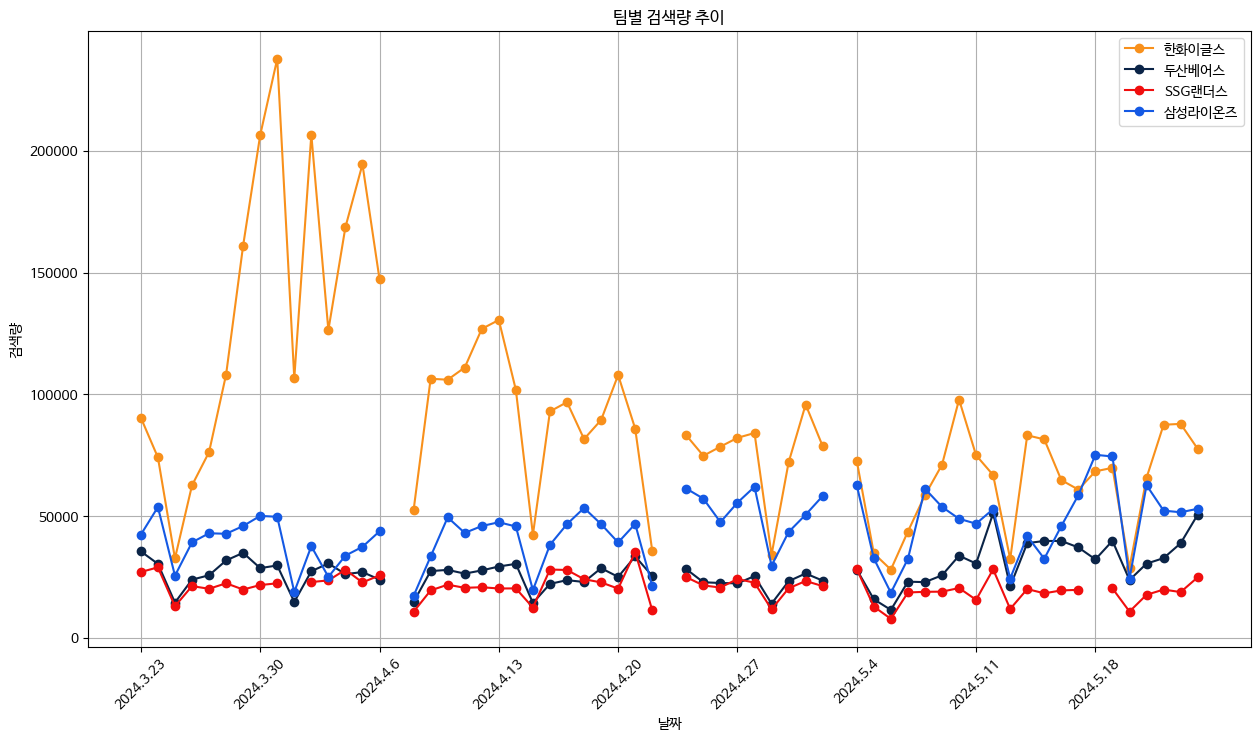

In [54]:
trend_2024 = pd.DataFrame(trend_2024)

# 팀 선정
teams = ['한화이글스', '두산베어스', 'SSG랜더스', '삼성라이온즈']
colors = ['#F8901B', '#0B2447', '#F00E0E', '#1459E4']

plt.figure(figsize=(15, 8))

for team, color in zip(teams, colors):
    team_df = trend_2024[trend_2024['팀명'] == team]
    dates = team_df.columns[1:]
    x_ticks = dates[::7]

    plt.plot(dates, team_df.values[0][1:], marker='o', label=team, color=color)

plt.title('팀별 검색량 추이')
plt.xlabel('날짜')
plt.ylabel('검색량')
plt.xticks(x_ticks, rotation=45)
plt.legend()
plt.grid(True)
plt.show()

> 헉! 한화이글시의 압승